In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib
from functions import load_and_standardize_df, generate_female_patient_data

Dataset Information:
This dataset includes the following features:

- age: The age of the patient.
- sex: Gender of the patient (0: female, 1: male).
- chest_pain: Type of chest pain.
- arterial_pressure: Resting blood pressure.
- total_cholesterol: Serum cholesterol.
- blood_glucose: Fasting blood sugar > 120 mg/dl.
- electrocardiogram_on_rest: Resting electrocardiographic results.
- max_heart_rate: Maximum heart rate achieved.
- exercise_produced_angina: Exercise induced angina.
- unlevel_ST: ST depression induced by exercise relative to rest.
- segment_st_in_ecg: slope of the ST segment.
- main_vessels_coloured_by_fluorescence: Coronary Artery
- thalium: thallium myocardial perfusion imaging (MPI)
- desease 

In [2]:
url = "C:\\Users\\alexa\\OneDrive\\Escritorio\\IRONHACK\\final_proyect\\csv\\heart.csv"

In [3]:
# Loads a CSV file from a URL, standardizes the column names (lowercase and replaces spaces with underscores), and sets pandas to display all columns

df = load_and_standardize_df(url)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
rename = {
    'cp': 'chest_pain',
    'trestbps': 'arterial_pressure',
    'chol': 'total_cholesterol',
    'fbs': 'blood_glucose',
    'restecg': 'electrocardiogram_on_rest',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_produced_angina',
    'oldpeak': 'unlevel_ST',
    'slope': 'segment_st_in_ecg',
    'ca': 'main_vessels_coloured_by_fluorescence',
    'thal': 'thalium',
    'target': 'disease'
}

df.rename(columns = rename, inplace=True)

In [6]:
df

,age,sex,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.isnull().sum()

age                                      0
sex                                      0
chest_pain                               0
arterial_pressure                        0
total_cholesterol                        0
blood_glucose                            0
electrocardiogram_on_rest                0
max_heart_rate                           0
exercise_produced_angina                 0
unlevel_ST                               0
segment_st_in_ecg                        0
main_vessels_coloured_by_fluorescence    0
thalium                                  0
disease                                  0
dtype: int64

In [8]:
# Count the number of males and females
male_count = df['sex'].value_counts().get(1, 0)  # 1 represents males
female_count = df['sex'].value_counts().get(0, 0)  # 0 represents females

print(f"Number of males: {male_count}")
print(f"Number of females: {female_count}")

Number of males: 207
Number of females: 96


In [9]:
# Generate 111 new rows of female data
new_female_data = generate_female_patient_data(111)

# Display the first rows of the newly generated DataFrame
print(new_female_data.head())

# Combine the new rows with the original dataset
df_extended = pd.concat([df, new_female_data], ignore_index=True)

# Verify the distribution of sex
print(df_extended['sex'].value_counts())

   age  sex  chest_pain  arterial_pressure  total_cholesterol  blood_glucose  \
0   68    0           2                131                164              1   
1   58    0           0                123                248              0   
2   44    0           2                120                197              1   
3   37    0           1                130                238              0   
4   50    0           2                137                213              1   

   electrocardiogram_on_rest  max_heart_rate  exercise_produced_angina  \
0                          2             187                         0   
1                          2             171                         1   
2                          0             139                         0   
3                          2             141                         0   
4                          1             106                         1   

   unlevel_ST  segment_st_in_ecg  main_vessels_coloured_by_fluorescence  \

In [10]:
# Round the 'unlevel_ST' column to two decimal places
df_extended['unlevel_ST'] = df_extended['unlevel_ST'].round(2)

In [11]:
df_extended

,age,sex,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,disease
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,69,0,2,149,239,0,1,173,0,2.34,1,2,1,0
410,51,0,0,144,135,0,2,130,1,3.12,1,3,0,1
411,56,0,0,133,328,0,0,135,1,1.89,2,1,0,0
412,64,0,0,132,224,1,0,124,0,4.18,1,0,1,1


In [12]:
# Create a csv file with the resampled data.
df_extended.to_csv('df_heart.csv', index=False)

## Feature selection

In [13]:
# Select features and target variable
X = df_extended.drop(columns=['disease'])
y = df_extended['disease']

# Normalize features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Correlation Matrix

correlation_matrix = df.corr()
correlation_matrix

,age,sex,chest_pain,arterial_pressure,total_cholesterol,blood_glucose,electrocardiogram_on_rest,max_heart_rate,exercise_produced_angina,unlevel_ST,segment_st_in_ecg,main_vessels_coloured_by_fluorescence,thalium,disease
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
arterial_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
total_cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
blood_glucose,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
electrocardiogram_on_rest,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_produced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
unlevel_ST,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


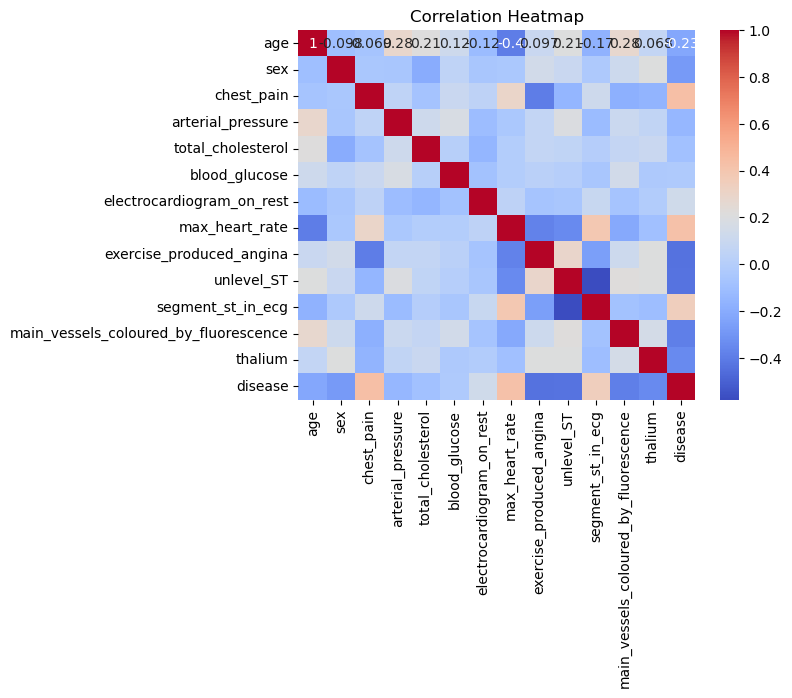

In [16]:
# Correlation Heatmap

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Logistic Regression

In [17]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear', class_weight='balanced'), param_grid, scoring='f1')
grid.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid.best_estimator_.predict(X_test)

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[22 10]
 [11 40]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        32
           1       0.80      0.78      0.79        51

    accuracy                           0.75        83
   macro avg       0.73      0.74      0.73        83
weighted avg       0.75      0.75      0.75        83

Accuracy: 0.7469879518072289


## Random forest

In [19]:
# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[21 11]
 [10 41]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        32
           1       0.79      0.80      0.80        51

    accuracy                           0.75        83
   macro avg       0.73      0.73      0.73        83
weighted avg       0.75      0.75      0.75        83

Accuracy: 0.7469879518072289


## KNeighbors

In [21]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [22]:
# Use the best estimator to predict on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.69      0.62      0.66        32
           1       0.78      0.82      0.80        51

    accuracy                           0.75        83
   macro avg       0.73      0.72      0.73        83
weighted avg       0.74      0.75      0.74        83

Accuracy: 0.7469879518072289


## Neural Networks

In [23]:
# Create and train the model
nn_model = MLPClassifier(random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

c:\Users\alexa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [24]:
# Predict on the test set
y_pred = nn_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[23  9]
 [11 40]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        32
           1       0.82      0.78      0.80        51

    accuracy                           0.76        83
   macro avg       0.75      0.75      0.75        83
weighted avg       0.76      0.76      0.76        83

Accuracy: 0.7590361445783133


## XGBoost Classifier

In [25]:
# Create and train the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

c:\Users\alexa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:30:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
 # Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[21 11]
 [ 9 42]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        32
           1       0.79      0.82      0.81        51

    accuracy                           0.76        83
   macro avg       0.75      0.74      0.74        83
weighted avg       0.76      0.76      0.76        83

Accuracy: 0.7590361445783133


## Best model slection

In [27]:
# Define the models
models = {
    'LogisticRegression': LogisticRegression(random_state=0),
    'RandomForest': RandomForestClassifier(random_state=0),
    'KNeighbors': KNeighborsClassifier(),
    'NeuralNetwork': MLPClassifier(random_state=0, max_iter=1000, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)
}

# Number of repetitions
n_repeats = 500

In [28]:
# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_test, y_test, metrics=['accuracy']):
    results = {metric: [] for metric in metrics}
    
    for _ in range(n_repeats):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        if 'accuracy' in metrics:
            results['accuracy'].append(accuracy_score(y_test, y_pred))
        if 'precision' in metrics:
            results['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        if 'recall' in metrics:
            results['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        if 'f1' in metrics:
            results['f1'].append(f1_score(y_test, y_pred, average='weighted'))
    
    return {metric: np.mean(results[metric]) for metric in metrics}

In [29]:
# Evaluate all models and store results
best_model = None
best_metrics = None
best_results = {}

for name, model in models.items():
    print(f"Evaluating model: {name}")
    results = evaluate_model(model, X_train, y_train, X_test, y_test, metrics=['accuracy', 'f1'])
    
    print(f"Results for {name}: {results}")
    best_results[name] = results
    
    # Select the best model based on a metric (e.g., 'accuracy' or 'f1')
    if best_model is None or results['accuracy'] > best_metrics['accuracy']:
        best_model = name
        best_metrics = results


Evaluating model: LogisticRegression
Results for LogisticRegression: {'accuracy': 0.746987951807229, 'f1': 0.7476816634397453}
Evaluating model: RandomForest
Results for RandomForest: {'accuracy': 0.7349397590361447, 'f1': 0.736305220883534}
Evaluating model: KNeighbors
Results for KNeighbors: {'accuracy': 0.746987951807229, 'f1': 0.748818884765657}
Evaluating model: NeuralNetwork
Results for NeuralNetwork: {'accuracy': 0.746987951807229, 'f1': 0.7443808018961092}


In [30]:
# Print the best model and its metrics
print(f"\nThe best model is: {best_model} with metrics: {best_metrics}")


The best model is: LogisticRegression with metrics: {'accuracy': 0.746987951807229, 'f1': 0.7476816634397453}


## Save the best model

In [31]:
# Save the trained model.

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']